In [1]:
# For numerical computing and data manipulation
import numpy as np
import pandas as pd

In [2]:
pwd

'C:\\Users\\iamni\\Dropbox\\Nihar\\Misc\\Data Visualizer\\Python'

# Data onboarding and cleaning

### Read the data

In [3]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', index_col='location')
# df = pd.read_csv('..\Data\owid-covid-data.csv',index_col='location')

### Removing unwanted dates

In [4]:
import datetime as dt
# now = dt.date.today()
# end_date = now.strftime("%Y-%m-%d")

# start_date = now - dt.timedelta(days=7)
# start_date = start_date.strftime("%Y-%m-%d")
start_date = '2020-09-01'

date_range = (df['date'] >= start_date) # & (data_import['date'] <= end_date)

In [5]:
df = df.loc[date_range]

# df

### Removing unwanted countries

In [6]:
countries = []
for country in df.index:
    if (country != 'International') & (country != 'World'):
        if country not in countries:
            countries.append(country)
            
# countries

In [7]:
df = df.loc[countries, :]

# df

### Sorting by Highest New Cases and Highest New Deaths

In [8]:
df_today = (df['date'] == max(df.date))
df_today = df.loc[df_today]

# df_today

In [9]:
df_today = df_today.sort_values(by='new_cases', ascending=False)
df_new_cases = df_today.head(8)

df_new_cases.index

Index(['India', 'United States', 'Brazil', 'Argentina', 'France', 'Russia',
       'Ukraine', 'United Kingdom'],
      dtype='object', name='location')

In [10]:
df_new_deaths = df_today.sort_values(by='new_deaths', ascending=False)
df_new_deaths = df_new_deaths.head(8)

df_new_deaths.index

Index(['India', 'United States', 'Brazil', 'Mexico', 'Argentina', 'Colombia',
       'Iran', 'Russia'],
      dtype='object', name='location')

### Keeping only 15 countries with highest new cases and highest new deaths

In [11]:
countries = []
for country in df_today.index:
    if (country in df_new_deaths.index) | (country in df_new_cases.index):
    # if (country.isin(df_new_deaths.index)) | (country.isin(df_new_cases.index)):
        countries.append(country)

len(countries)

11

In [12]:
df = df.loc[countries, :]

# df

In [13]:
# Save data file
df.to_csv('../Tableau/tableau_data.csv')

In [14]:
plot_data = df[['date','total_cases','new_cases','total_deaths','new_deaths']]
plot_data

,date,total_cases,new_cases,total_deaths,new_deaths
location,,,,,
India,2020-09-01,3691166.0,69921.0,65228.0,759.0
India,2020-09-02,3769523.0,78357.0,66333.0,1105.0
India,2020-09-03,3853406.0,83883.0,67376.0,1043.0
India,2020-09-04,3936747.0,83341.0,68472.0,1096.0
India,2020-09-05,4023179.0,86432.0,69561.0,1089.0
...,...,...,...,...,...
Iran,2020-09-29,449960.0,3512.0,25779.0,190.0
Iran,2020-09-30,453637.0,3677.0,25986.0,207.0
Iran,2020-10-01,457219.0,3582.0,26169.0,183.0


# Plotting

### Formatting data

In [15]:
plot_date=[]
for dates in plot_data['date']:
    if dates not in plot_date:
        plot_date.append(dates)
# plot_date

In [16]:
num_of_data_points = plot_data.index.value_counts()
num_of_data_points

Ukraine           33
Colombia          33
Mexico            33
India             33
France            33
Russia            33
Iran              33
United Kingdom    33
Brazil            33
Argentina         33
United States     33
Name: location, dtype: int64

In [17]:
dic_new_cases={}
for i in range(len(countries)):
    dic_new_cases[i] = plot_data.loc[countries[i], ['date','new_cases']]

# dic_new_cases


# df_india = plot_data.loc['India', :]
# df_us = plot_data.loc['United States', :]

# df_india_new_cases = df_india['new_cases']
# df_india_new_deaths = df_india['new_deaths']

# df_us_new_cases = df_us['new_cases']
# df_us_new_deaths = df_us['new_deaths']

In [18]:
dic_new_deaths={}
for i in range(len(countries)):
    dic_new_deaths[i] = plot_data.loc[countries[i], ['date','new_deaths']]
    
# dic_new_deaths

In [19]:
chart_title = 'Chart of Countries Hardest Hit Today ('+str(max(plot_date))+')'

### Plot (finally!)

In [20]:
import matplotlib.pyplot as plt

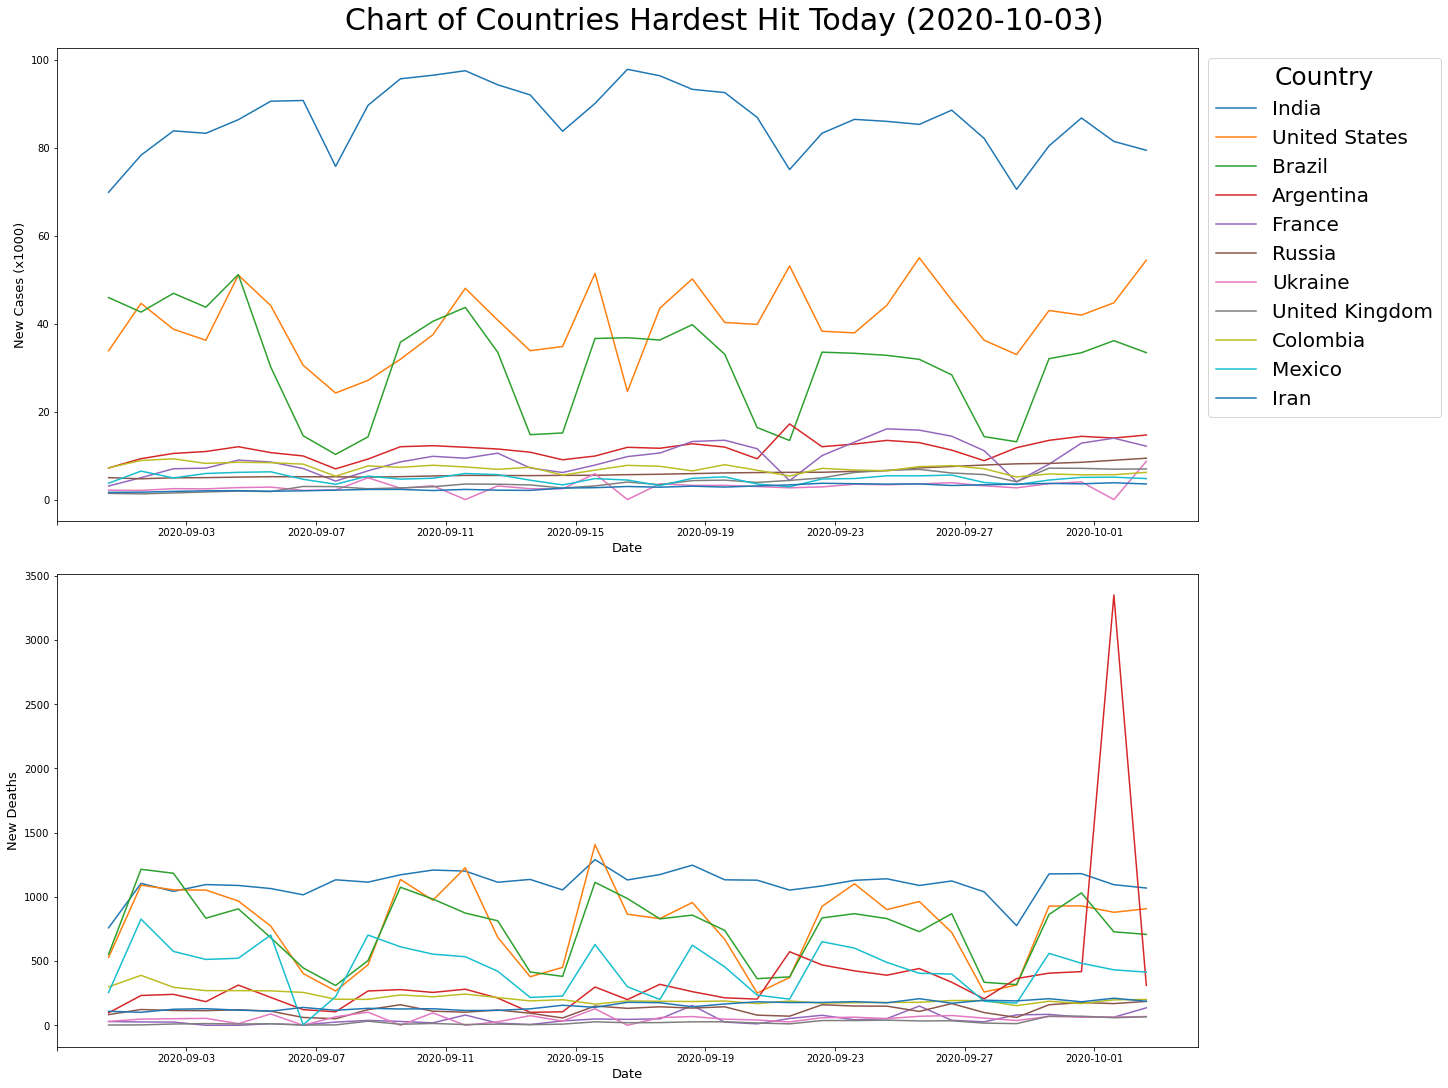

In [21]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(20,15), constrained_layout=True)
f.suptitle(chart_title, fontsize=30)

for x in range(len(countries)):
    ax1.plot(plot_date, dic_new_cases[x]['new_cases']/1000, label=countries[x])
# ax1.plot(plot_date, df_india_new_cases/1000, label='India')
# ax1.plot(plot_date, df_us_new_cases/1000, label='US')
ax1.set_xlabel('Date', fontsize=13)
ax1.set_ylabel('New Cases (x1000)', fontsize=13)
# ax1.set_title('New Cases over time', fontsize=18)
ax1.legend(bbox_to_anchor=(1, 1), fontsize=20, title="Country", title_fontsize=25)

for x in range(len(countries)):
    ax2.plot(plot_date, dic_new_deaths[x]['new_deaths'], label=countries[x])
# ax2.plot(plot_date, df_india_new_deaths, label='India')
# ax2.plot(plot_date, df_us_new_deaths, label='US')
ax2.set_xlabel('Date', fontsize=13)
ax2.set_ylabel('New Deaths', fontsize=13)
# ax2.set_title('New Deaths over time', fontsize=18)

start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 4))
ax2.xaxis.set_ticks(np.arange(start, end, 4))

# plt.subplots_adjust(hspace=0.4)
plt.show()

In [22]:
f.savefig('covid_plot.png', dpi=300)